In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

In [2]:
FPT = pd.read_csv('/content/FPT1.csv',sep=";")
FPT = FPT.dropna() # Drop missing values
FPT= FPT.reset_index(drop=True) # Reset the index

FPT

,Date,Price,High,Low
0,15/12/2016,15077.4,15167.5,15059.4
1,16/12/2016,15167.5,15167.5,15059.4
2,19/12/2016,15383.6,15383.6,15167.5
3,20/12/2016,15329.6,15455.7,15311.6
4,21/12/2016,15311.6,15401.7,15293.6
...,...,...,...,...
1745,11/12/2023,95000.0,95700.0,94600.0
1746,12/12/2023,96800.0,96800.0,95300.0
1747,13/12/2023,95200.0,97400.0,95200.0
1748,14/12/2023,96200.0,96400.0,95200.0


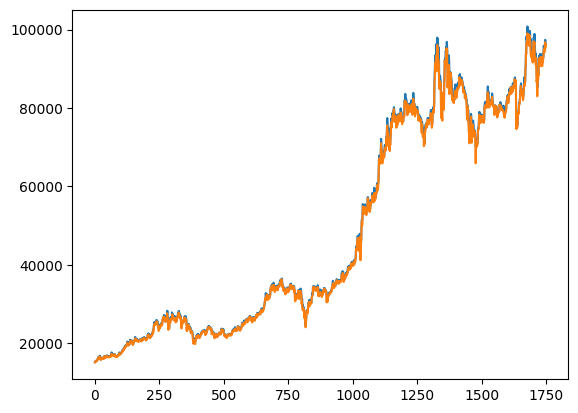

In [3]:
# gán biến
y = FPT[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
x = FPT[['High']] # các biến độc lập

plt.plot(x)
plt.plot(y)
plt.show()

# 7:3

In [4]:
train_size = int(0.7 * len(FPT))
test_size = len(FPT) - train_size

y_train = y[:train_size]
x_train = x[:train_size]
y_test = y[train_size:]
x_test = x[train_size:]

In [5]:
# tạo mô hình svr
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(x_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(x_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(x_train, y_train)

SVR(kernel='sigmoid')

In [6]:
# dự đoán giá đóng cửa của FPT trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(x_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(x_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(x_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [7]:
# tính toán độ chính xác của mô hình
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))


mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
test_rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [8]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MAE:",  mae_sigmoid)
print("Sigmoid Testing RMSE:", test_rmse_sigmoid)

RBF MAPE: 10.411899571823003
RBF MAE:  9367.336298659417
RBF Testing RMSE: Price    14762.561737
dtype: float64
Poly MAPE: 11.235527780510985
Poly MAE: 9657.276678317005
Poly Testing RMSE: Price    11229.330541
dtype: float64
Sigmoid MAPE: 67.69774982508216
Sigmoid MAE: 56184.85159520317
Sigmoid Testing RMSE: Price    56580.416366
dtype: float64


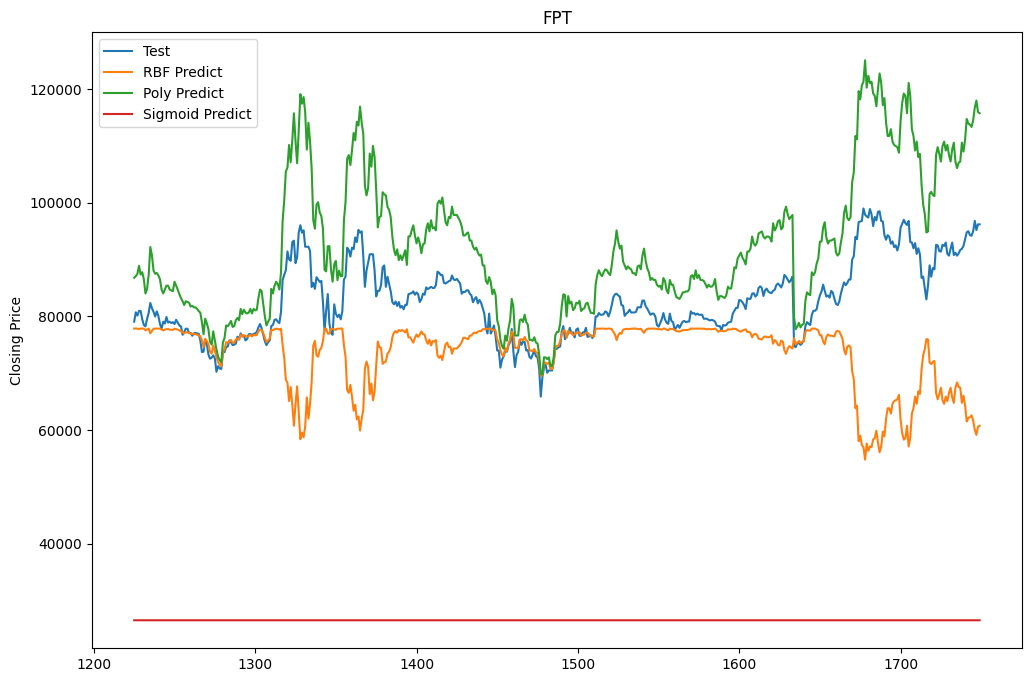

In [9]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Closing Price')
plt.title('FPT')
plt.legend()
plt.show()

In [10]:
# láy giá trị Price của ngày cuối cùng trong dataset
last_index = FPT.index[-1]
last_row = FPT.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data



array([[96200.]])

In [11]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([60927.06341958]), array([59939.72363686]), array([59004.69640271]), array([58131.48881295]), array([57323.26002102]), array([56578.68495266]), array([55893.75841626]), array([55263.17386001]), array([54681.22937076]), array([54142.35481348]), array([53641.38057705]), array([53173.64748106]), array([52735.02688976]), array([52321.89443656]), array([51931.08286754]), array([51559.82816071]), array([51205.7162892]), array([50866.63411032]), array([50540.72572506]), array([50226.354532]), array([49922.07065296]), array([49626.58317625]), array([49338.73659846]), array([49057.49086381]), array([48781.90445626]), array([48511.12006891]), array([48244.35244499]), array([47980.87805012]), array([47720.02629338]), array([47461.17206498])]
Kết quả dự đoán sử dụng Poly: [array([47203.72940109]), array([46947.14612346]), array([46690.89933222]), array([46434.49165719]), array([46177.44819589]), array([45919.31408629]), array([45659.65267986]), array([45398.0442

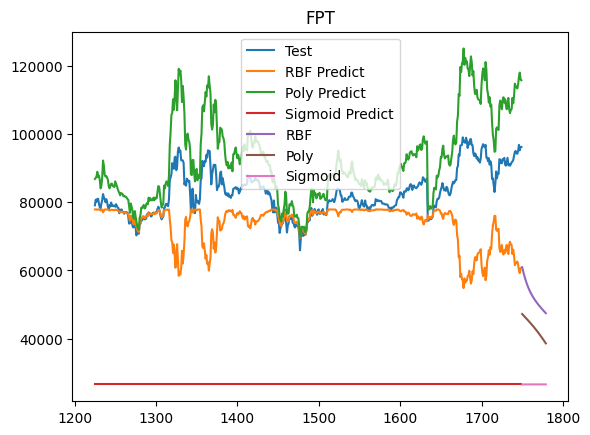

In [13]:
#vẽ mô hình
#plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid')
plt.title('FPT')
plt.legend()
plt.show()

#8:2

In [14]:
train_size = int(0.8 * len(FPT))
test_size = len(FPT) - train_size

y_train = y[:train_size]
x_train = x[:train_size]
y_test = y[train_size:]
x_test = x[train_size:]

In [15]:
# tạo mô hình svr
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(x_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(x_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(x_train, y_train)

SVR(kernel='sigmoid')

In [16]:
# dự đoán giá đóng cửa của FPT trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(x_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(x_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(x_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [17]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))


mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
test_rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [18]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MAE:",  mae_sigmoid)
print("Sigmoid Testing RMSE:", test_rmse_sigmoid)

RBF MAPE: 2.410069995447989
RBF MAE:  2198.0567268838545
RBF Testing RMSE: Price    4061.462714
dtype: float64
Poly MAPE: 4.84675367028434
Poly MAE: 4296.566133430826
Poly Testing RMSE: Price    6005.892299
dtype: float64
Sigmoid MAPE: 63.06727762394287
Sigmoid MAE: 52706.98420250865
Sigmoid Testing RMSE: Price    53150.632825
dtype: float64


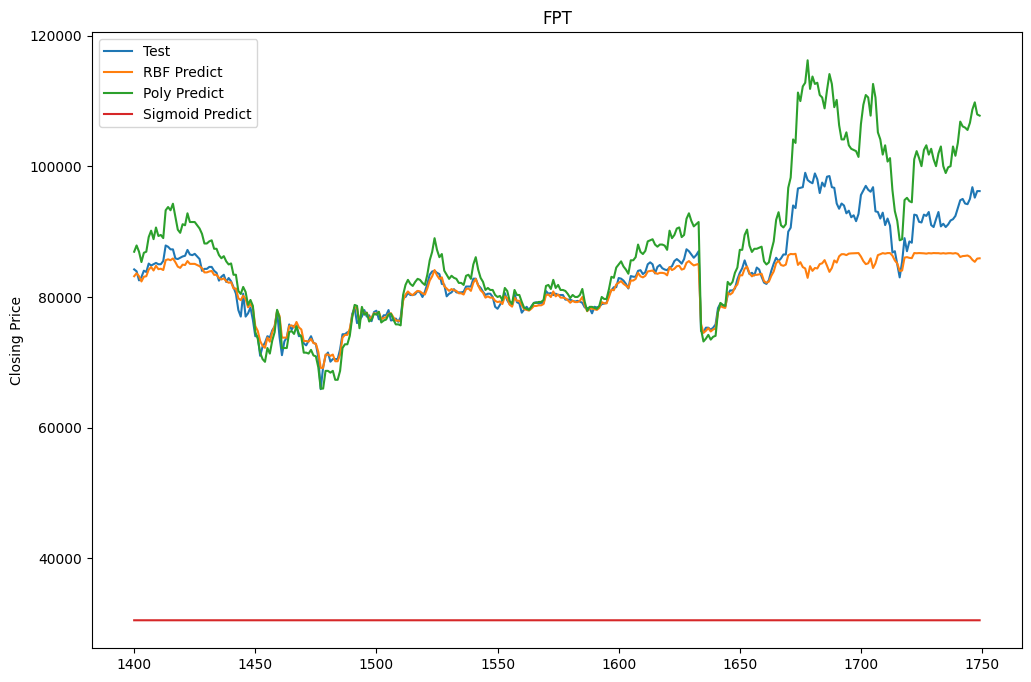

In [19]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Closing Price')
plt.title('FPT')
plt.legend()
plt.show()

In [20]:
# láy giá trị Price của ngày cuối cùng trong dataset
last_index = FPT.index[-1]
last_row = FPT.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[96200.]])

In [21]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([85958.75514112]), array([84426.77946472]), array([83334.70934104]), array([82459.99818815]), array([81710.02152229]), array([81036.67492042]), array([80411.33468815]), array([79815.21353845]), array([79234.98812884]), array([78660.59041821]), array([78084.01015248]), array([77498.62250842]), array([76898.81666273]), array([76279.8148205]), array([75637.62383472]), array([74969.08551942]), array([74272.00023194]), array([73545.2971051]), array([72789.21700384]), array([72005.4646553]), array([71197.2796529]), array([70369.37843137]), array([69527.7360055]), array([68679.20776348]), array([67831.03098546]), array([66990.27962768]), array([66163.36031001]), array([65355.62579438]), array([64571.14963155]), array([63812.66586413])]
Kết quả dự đoán sử dụng Poly: [array([63081.64519485]), array([62378.46206424]), array([61702.60570986]), array([61052.89726539]), array([60427.68791573]), array([59825.02532073]), array([59242.78465591]), array([58678.766295

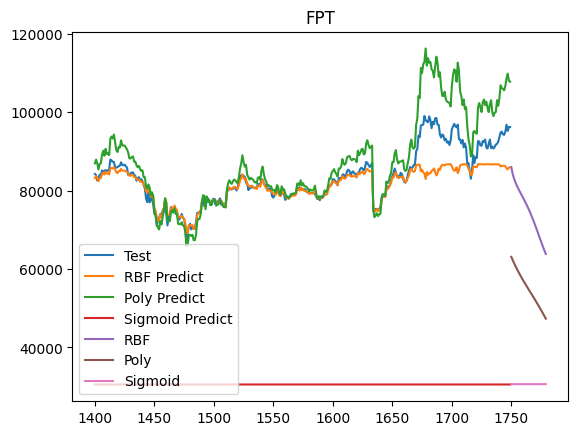

In [22]:
#vẽ mô hình
#plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid')
plt.title('FPT')
plt.legend()
plt.show()

#9:1

In [23]:
train_size = int(0.9 * len(FPT))
test_size = len(FPT) - train_size

y_train = y[:train_size]
x_train = x[:train_size]
y_test = y[train_size:]
x_test = x[train_size:]

In [24]:
# tạo mô hình svr
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(x_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(x_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(x_train, y_train)

SVR(kernel='sigmoid')

In [25]:
# dự đoán giá đóng cửa của FPT trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(x_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(x_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(x_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [26]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))


mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
test_rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [27]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MAE:",  mae_sigmoid)
print("Sigmoid Testing RMSE:", test_rmse_sigmoid)

RBF MAPE: 3.1578722396925976
RBF MAE:  2963.2476492293367
RBF Testing RMSE: Price    4578.08946
dtype: float64
Poly MAPE: 6.304109912445213
Poly MAE: 5781.35297569208
Poly Testing RMSE: Price    7370.274104
dtype: float64
Sigmoid MAPE: 62.089623057407174
Sigmoid MAE: 54325.51131064632
Sigmoid Testing RMSE: Price    54715.853153
dtype: float64


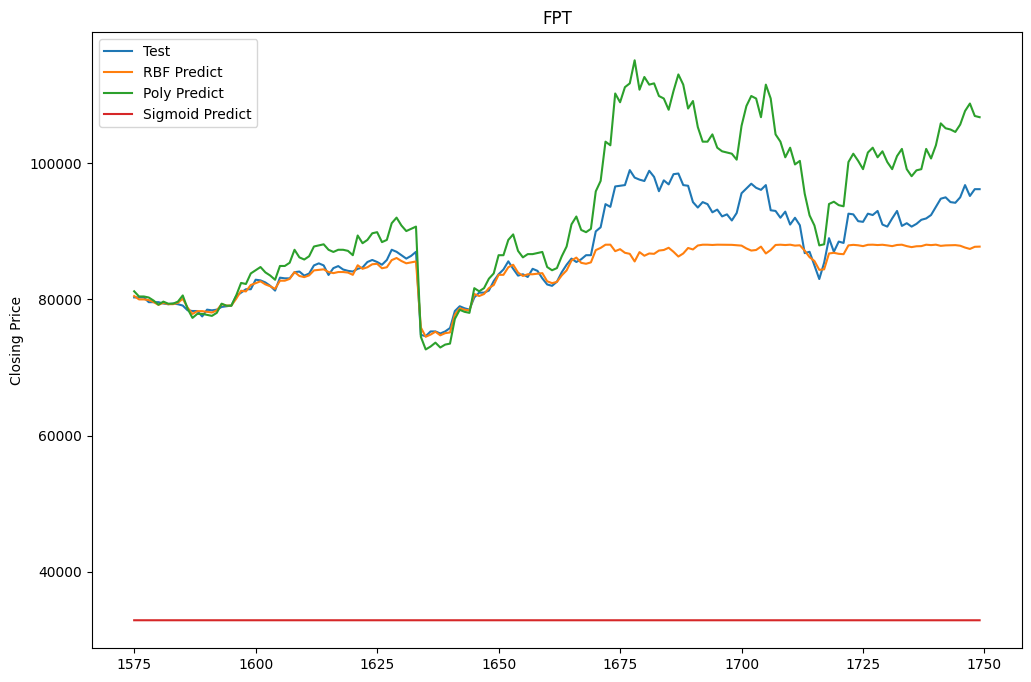

In [28]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Closing Price')
plt.title('FPT')
plt.legend()
plt.show()

In [29]:
# láy giá trị Price của ngày cuối cùng trong dataset
last_index = FPT.index[-1]
last_row = FPT.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[96200.]])

In [30]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([87784.13837195]), array([86078.91684979]), array([84936.3333719]), array([84056.96002303]), array([83326.35722649]), array([82687.95835219]), array([82109.35265574]), array([81569.97082139]), array([81055.6815266]), array([80556.11102155]), array([80063.19096076]), array([79570.31947263]), array([79071.85538389]), array([78562.80853524]), array([78038.65604452]), array([77495.24810336]), array([76928.78478419]), array([76335.85475246]), array([75713.53077998]), array([75059.5166143]), array([74372.33531946]), array([73651.54093105]), array([72897.92427784]), array([72113.67284206]), array([71302.43816574]), array([70469.26813999]), array([69620.3796158]), array([68762.77833981]), array([67903.77042114]), array([67050.43924988])]
Kết quả dự đoán sử dụng Poly: [array([66209.17165884]), array([65385.3026636]), array([64582.91563539]), array([63804.7976138]), array([63052.52053073]), array([62326.60496137]), array([61626.72292523]), array([60951.9051259

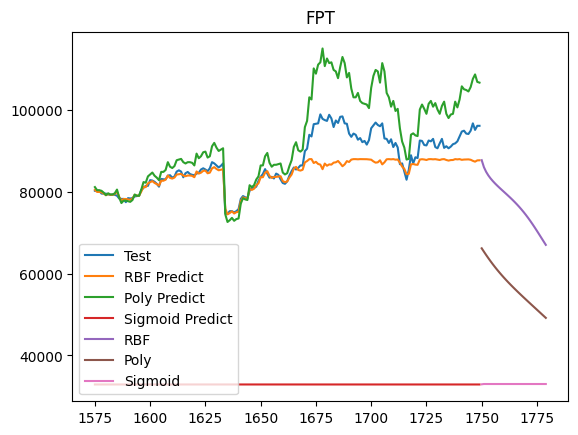

In [31]:
#vẽ mô hình
#plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid')
plt.title('FPT')
plt.legend()
plt.show()